<p style="text-align: justify;">
The selection of features for this analysis was guided by their potential influence on trip duration, ensuring a balance between geographical relevance and ride-specific attributes. The heatmap visualization helped in understanding their correlations.

# Selected Features:

### Pickup & Dropoff Coordinates (Latitude & Longitude):

These features define the trip’s start and end points, making them essential for estimating travel distance.

Although their direct correlation with trip duration is not very strong, they are crucial for distance-based calculations, which play a key role in determining trip length.

### Passenger Count:

Despite its weak correlation with trip duration, it is included due to its potential impact on ride-sharing scenarios.

A higher passenger count could indicate shared rides, potentially leading to longer trip durations due to multiple stops.

# Excluded Features:

### Pickup & Dropoff Timestamps:

These variables exhibited very low correlation with trip duration in the heatmap, indicating that time of day alone does not strongly affect trip length.

Instead of using raw timestamps, feature engineering (e.g., extracting rush hour indicators, day-of-week effects) would be more insightful.

### Pickup & Dropoff Hour:

Although slightly correlated with each other, they showed minimal correlation with trip duration, making them less useful for direct analysis.

Time-based effects may be better captured through aggregated time features rather than individual hour values.



The selected features—pickup and dropoff coordinates and passenger count—are already present in raw form and can be directly used in analysis.

However, time-based features like timestamps require transformation into more meaningful representations (e.g., rush hour indicators, weekday/weekend effects, or trip distance calculations) for better predictive power.

# Conclusion

The selected features provide a strong foundation for understanding trip duration, prioritizing geographical location and passenger count, while excluding time-based variables with limited predictive power.
Further improvements can be made through feature engineering, such as calculating Haversine distance, identifying rush hour effects, or incorporating real-time traffic data, to enhance the model's predictive accuracy.
</p>

# **Heatmap of all features**

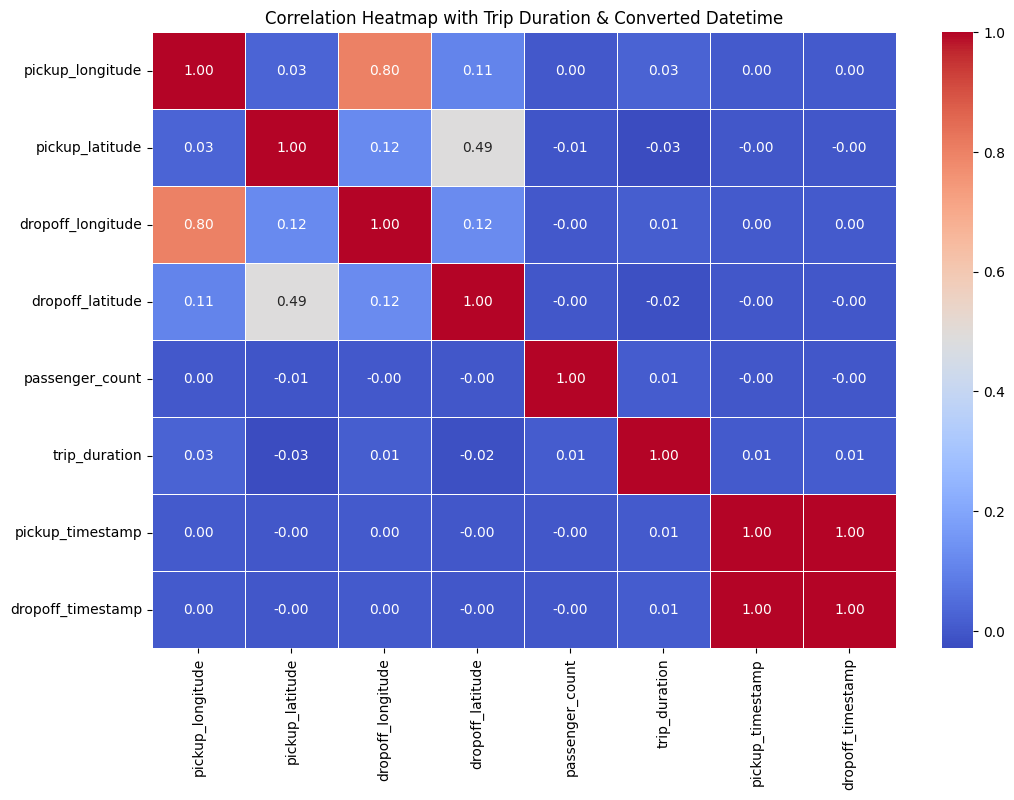

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset = np.load("nyc_taxi_data.npy", allow_pickle=True).item()
X_train_raw, y_train_raw, X_test_raw, y_test_raw = (
    dataset["X_train"],
    dataset["y_train"],
    dataset["X_test"],
    dataset["y_test"],
)

# Define column names
column_names = [
    "pickup_datetime", "dropoff_datetime",
    "pickup_longitude", "pickup_latitude",
    "dropoff_longitude", "dropoff_latitude",
    "passenger_count"
]


df_train = pd.DataFrame(X_train_raw, columns=column_names)
df_train["trip_duration"] = y_train_raw


df_train["pickup_datetime"] = pd.to_datetime(df_train["pickup_datetime"])
df_train["dropoff_datetime"] = pd.to_datetime(df_train["dropoff_datetime"])


df_train['pickup_timestamp'] = df_train['pickup_datetime'].astype('int64') // 10**9
df_train['dropoff_timestamp'] = df_train['dropoff_datetime'].astype('int64') // 10**9


numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_train[numeric_cols].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with Trip Duration & Converted Datetime")
plt.show()


# **Heatmap of the selected features**

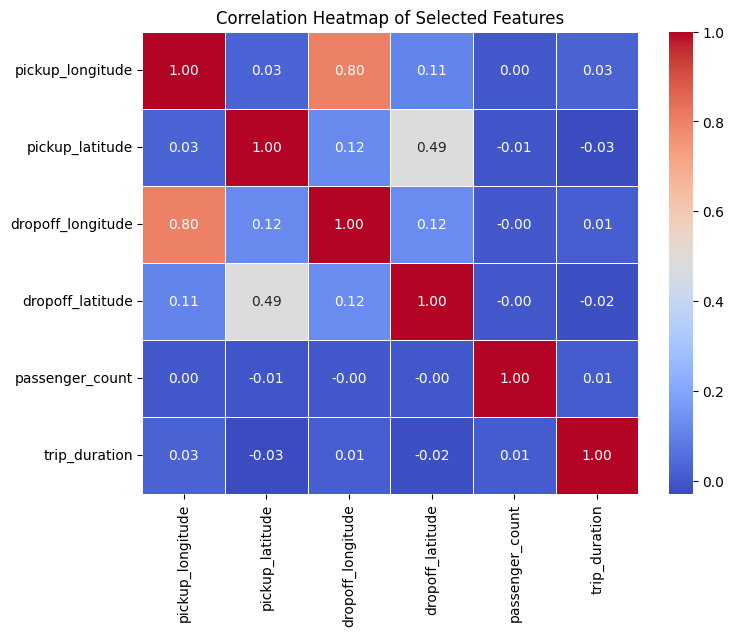

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


selected_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'trip_duration']


corr_matrix_selected = df_train[selected_features].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()


# **Normalization**

<p style="text-align: justify;">The code normalizes selected features (pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, and passenger_count) using StandardScaler, which transforms them to have a mean of 0 and a standard deviation of 1. This ensures all features are on a comparable scale, improving model performance. Boxplots visualize the distributions before and after normalization. The normalized features help machine learning models converge faster and perform better.**

</p>

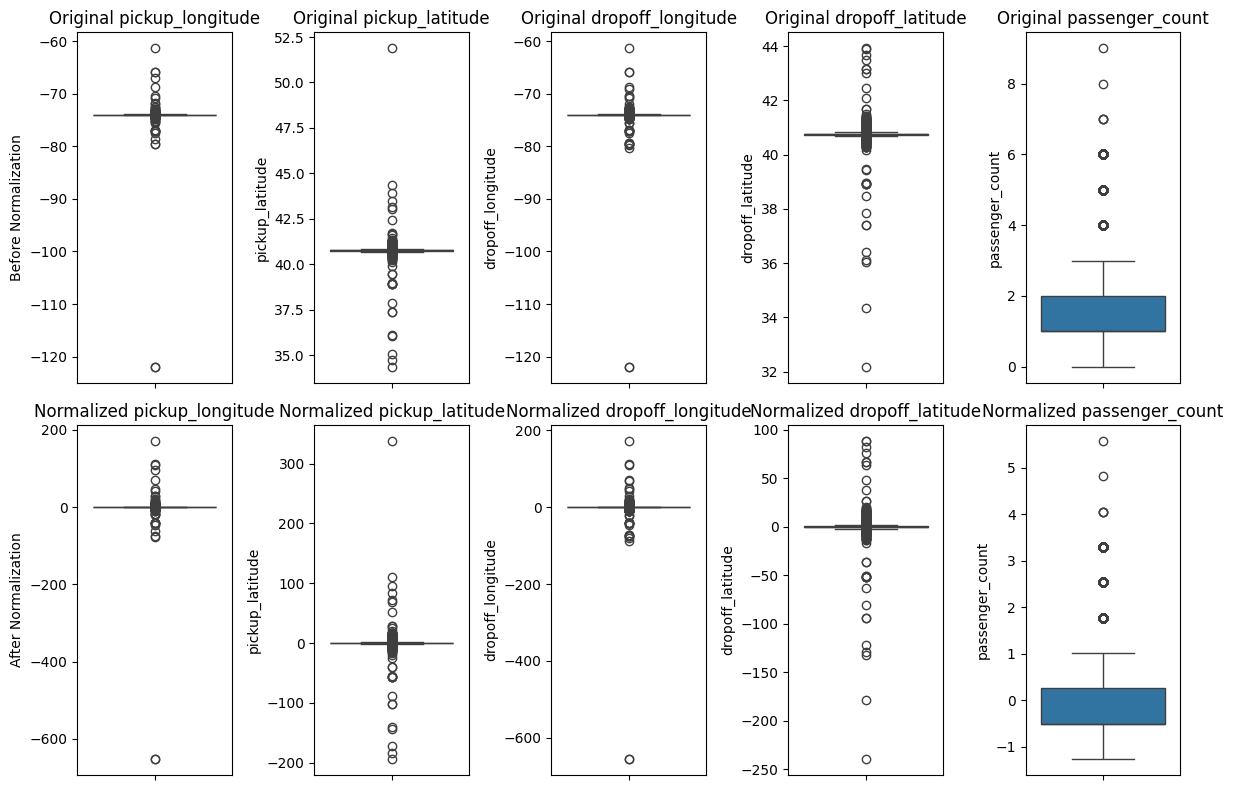

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


dataset = np.load("nyc_taxi_data.npy", allow_pickle=True).item()
X_train_raw, y_train_raw, X_test_raw, y_test_raw = (
    dataset["X_train"],
    dataset["y_train"],
    dataset["X_test"],
    dataset["y_test"],
)


features = [
    "pickup_longitude", "pickup_latitude",
    "dropoff_longitude", "dropoff_latitude",
    "passenger_count"
]

df_train = pd.DataFrame(X_train_raw, columns=features)




scaler = StandardScaler()
df_train_normalized = df_train.copy()
df_train_normalized[features] = scaler.fit_transform(df_train[features])


fig, axes = plt.subplots(2, len(features), figsize=(12, 8))


for i, feature in enumerate(features):
    sns.boxplot(y=df_train[feature], ax=axes[0, i])
    axes[0, i].set_title(f"Original {feature}")

axes[0, 0].set_ylabel("Before Normalization")


for i, feature in enumerate(features):
    sns.boxplot(y=df_train_normalized[feature], ax=axes[1, i])
    axes[1, i].set_title(f"Normalized {feature}")

axes[1, 0].set_ylabel("After Normalization")

plt.tight_layout()
plt.show()
